# Exercise: Feature Scaling

Datasets often have **numerical** data expressed in different units and ranges (i.e.: weight in Kilograms but height in Meters).

Feature Scaling is a technique that scales our numeric features, so they are all expressed in a similar range, which is a requirement for some algorithms to work properly and **may** even improve performance in models where it is not a mandatory (it can help some Gradient Descent models to converge faster).


Is this unit we will look at a dataset that has features in different units and ranges, apply feature scaling and analyze the results.

We will also compare models trained with and without feature scaling.

## Preparing data
We will use a dataset that correlates automobile engine features to fuel efficiency:



In [29]:
# Import everything we will need for this unit
import pandas as pd
import numpy as np
import operator
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load data from our dataset file into a pandas dataframe
dataset = pd.read_csv('Data/auto-mpg-cleaned.csv')

# Check what's in the dataset
dataset



,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,27.0,4,97.0,88,2130,14.5,70,3,datsun pl510
1,26.0,4,121.0,113,2234,12.5,70,2,bmw 2002
2,26.0,4,97.0,46,1835,20.5,70,2,volkswagen 1131 deluxe sedan
3,25.0,4,110.0,87,2672,17.5,70,2,peugeot 504
4,25.0,4,104.0,95,2375,17.5,70,2,saab 99e
...,...,...,...,...,...,...,...,...,...
387,27.0,4,112.0,88,2640,18.6,82,1,chevrolet cavalier wagon
388,26.0,4,156.0,92,2585,14.5,82,1,chrysler lebaron medallion
389,25.0,6,181.0,110,2945,16.4,82,1,buick century limited
390,24.0,4,140.0,92,2865,16.4,82,1,ford fairmont futura


The numerical features above are represented by different units (e.g., miles per gallon, horsepower, pounds, meters per seconds squared) and as such are distributed in different ranges.

We will build models that try to predict fuel efficiency based on a selection of numerical features from this dataset:

In [30]:
# Select only numerical features for training and testing
# Convert both X and y to numpy arrays for processing
X = dataset[['displacement', 'horsepower', 'weight', 'acceleration']]
y = dataset['mpg'].to_numpy()

# Split test and Train sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

# Display first values in training set
X_train[:5]

,displacement,horsepower,weight,acceleration
218,98.0,63,2051,17.0
254,119.0,97,2405,14.9
299,267.0,125,3605,15.0
191,116.0,81,2220,16.9
56,98.0,80,2164,15.0


In [31]:
# Train model with unscaled features
# We have to set normalize to False
# to disable automatic scaling and centering
model = LinearRegression(normalize=False,)
model.fit(X_train,y_train)

# Evaluate using test set
y_hat = model.predict(X_test)

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test,y_hat))
r2 = r2_score(y_test,y_hat)

print(f"RMSE metrics: {rmse}")
print(f"R2 metrics: {r2}")


RMSE metrics: 5.026357848273459
R2 metrics: 0.6334075027239533


Notice that after training and evaluation we save the model's metrics.

### Scaling

There are several different techniques used to scale data, but we will focus on one of the most commonly used -  *Standardisation*.

Standardisation will scale features so they follow a *normal distribution*: the mean becomes **0** and the standard deviation **1**.

Here’s the formula for standardization:

```
X_scaled = X - μ / σ
```

(where `μ` is the mean `σ` is the standard deviation)









Let's apply feature scaling to our feature matrices using `sklearn's` `StandardScaler`:

In [32]:

# Split test and Train sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=0)

# Instantiate scaler, get fit from training feature set
scaler = StandardScaler().fit(X_train2)

# Scale both training and test sets
X_train2_scaled = scaler.transform(X_train2)
X_test2_scaled = scaler.transform(X_test2)

# Display first values in scaled training set nalyze the result of scaling
scaled_features = pd.DataFrame(data=X_train2_scaled, index=None, columns=['displacement', 'horsepower', 'weight', 'acceleration'])
scaled_features[:5]



,displacement,horsepower,weight,acceleration
0,-0.923086,-1.083538,-1.100844,0.496798
1,-0.720932,-0.196196,-0.683408,-0.246702
2,0.703771,0.534557,0.731631,-0.211297
3,-0.749811,-0.613769,-0.901560,0.461393
4,-0.923086,-0.639867,-0.967595,-0.211297


Notice how all features are evenly distributed across the same range now (we will plot a comparison with the original features ahead).


### Important Insights:

1- You don't need to scale the target values.

2- We fit the `scaler` using the training data, then use that same `scaler` transform the test data.

## Comparing the Feature Matrix Before and After Scaling

Let's use `boxplots` to understand the results of applying standardization to the feature matrix:

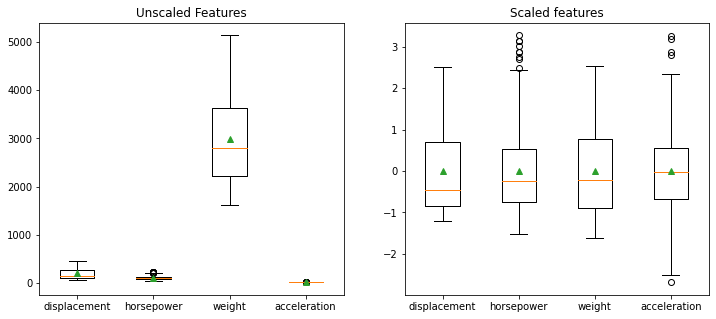

In [33]:
# compare boxplots of data
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

# Unscaled
axs[0].boxplot(X_train, labels=['displacement', 'horsepower', 'weight', 'acceleration'], showmeans=True,)
axs[0].set_title('Unscaled Features')

# Scaled
axs[1].boxplot(df, labels=['displacement', 'horsepower', 'weight', 'acceleration'], showmeans=True,)
axs[1].set_title('Scaled features')

plt.show()

After standardisati0n, features are now distributed within the same range and have the same mean, so they exert a similar influence when used in learning models.

Now let's train a new model with the scaled data:

In [34]:
# Train model with unscaled features
# We also disable sklearn's default normalization here
model2 = LinearRegression(normalize=False)
model2.fit(X_train2_scaled,y_train2)

# Evaluate using test_set
y_hat2 = model2.predict(X_test2_scaled)

# Calculate metrics
rmse_2 = np.sqrt(mean_squared_error(y_test,y_hat2))
r2_2 = r2_score(y_test2,y_hat2)


# Get metrics for new model for comparison
print(f"RMSE metrics: {rmse_2}")
print(f"R2 metrics: {r2_2}")

RMSE metrics: 5.026357848273459
R2 metrics: 0.6334075027239534


## Model Comparison

In [35]:
# # Use a dataframe to create a comparison table of metrics
l = [["Without Feature Scaling", rmse, r2],
    ["With Feature Scaling", rmse_2, r2_2]]

pd.DataFrame(l, columns=["", "RMSE", "R2"])

,,RMSE,R2
0,Without Feature Scaling,5.026358,0.633408
1,With Feature Scaling,5.026358,0.633408


Scaling data did not seem to improve the performance of the second model, as both models have equal values for `RMSE` and `R2` metrics (it **might** have converged a bit faster, though).

This means only that our choice of algorithm doesn't particularly benefit from it, but it still could be beneficial in other regression problems and datasets.

As stated in the introduction, scaling is much more relavant when using other algorithms, such as KNN, K-Means and SVM, so we encourage you to understand the concept and how to apply it.



## Summary

In this unit we presented the concept of *Feature Scaling* and how it can be beneficial in models that have features expressed in different units and ranges.

You were shown how to apply *Standardisation* (one method to scale data) to your training and test matrices and how to visualize its results by using `boxplots`.

Finally, you learned how to compare unscaled and scaled models and decide if this technique is useful to your particular problem.